# Feuille de TP7 - Triangle de Sierpinski

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Le triangle de Sierpinski est une fractale dont des approximations arbitrairement proches peuvent être onbtenues de la manière récurrente par l'algorithme suivant :
1. Commencer à partir d'un triangle quelconque du plan. (Le triangle canonique de Sierpinski se construit à partir d'un triangle équilatéral ayant une base parallèle à l'axe des abscisses.)
2. Tracer les trois segments qui joignent deux à deux les milieux des côtés du triangle, ce qui délimite 4 nouveaux triangles.
3. Recommencer à la deuxième étape avec chacun des trois petits triangles de coin obtenus.

<img src="sierpinski.png"/>

Par la suite, nous allons construire cette fractale en partant d'un triangle équilatéral de base horizontale, comme sur l'exemple ci-dessus.

## Pour commencer

**Question 1**
Contruire à tableau `triangle0` de dimension 2, à 2 lignes et 3 colonnes tel que :
$$ triangle0 = \begin{pmatrix} A_x & B_X & C_x \\ A_y & B_y & C_y \end{pmatrix}$$
où $(A_x ; A_y)$ sont les coordonnées de $A$ et idem pour $B$ et $C$.

In [8]:
triangle0 = [[0,100,50],[0,0,86.6]]

**Question 2**
+ Ecrire une fonction `dessine_triange` qui prend en argument un axe `ax`, un tableau `triangle` de profil (2,3) et qui dessine le triangle représenté par le tableau triangle. 
+ Testez la fonction avec `triangle0`

In [9]:
def dessine_triange(ax,triangle):
    ax.plot(triangle[0],triangle[1],color='blue')
    x=[triangle[0][0],triangle[0][2]]
    y=[triangle[1][0],triangle[1][2]]
    ax.plot(x,y,color='blue')

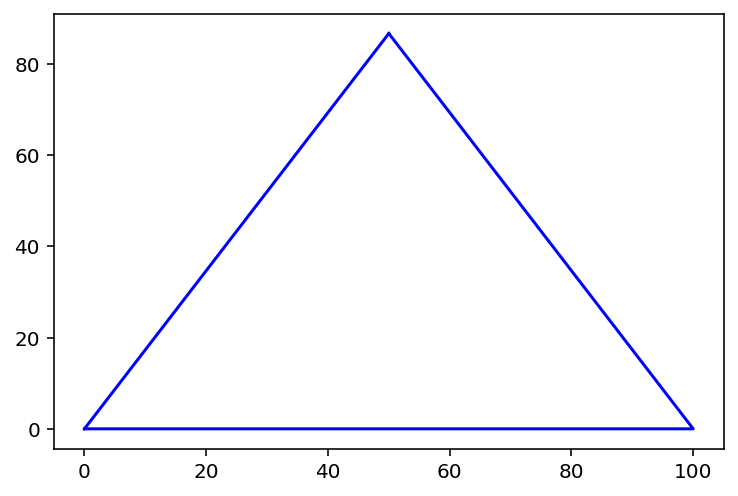

In [10]:
ax = plt.axes()
dessine_triange(ax, triangle0)

## Pour passer de l'étape 0 à l'étape 1

**Question 3**

Soit `triangle` un tableau représentant un triangle ABC.
Ecrire une fonction `sous_triangle` qui :
+ prend en argument d'entrée un tableau de taille (2,3) `triangle`,
+ calcule les milieux $d$, $e$ et $f$ de chaque côté du triangle tels que 
    + $d$ soit le milieu de $CA$,
    + $e$ soit le milieu de $AB$,
    + $f$ soit le milieu de $BC$,
+ renvoie trois tableaux `tri1`, `tri2` et `tri3` tels que (attention à l'ordre des points !) :
    + `tri1` représente le triangle $Aed$,
    + `tri2` représente le triangle $eBf$,
    + `tri3` représente le triangle $dfC$,

In [14]:
def tabT(a, b, c):
    tab = [[a[0],b[0],c[0]],[a[1],b[1],c[1]]]
    return tab


def tabC(t):
    a=[t[0][0],t[1][0]]
    b=[t[0][1],t[1][1]]
    c=[t[0][2],t[1][2]]
    return a,b,c


def sous_triangle(triangle):
    d=[(triangle[0][0]+triangle[0][2])/2,(triangle[1][0]+triangle[1][2])/2]
    e=[(triangle[0][0]+triangle[0][1])/2,(triangle[1][0]+triangle[1][1])/2]
    f=[(triangle[0][2]+triangle[0][1])/2,(triangle[1][2]+triangle[1][1])/2]
    a,b,c=tabC(triangle)
    tri1=tabT(a,e,d)
    tri2=tabT(e,b,f)
    tri3=tabT(d,f,c)
    return tri1,tri2,tri3

sous_triangle(triangle0)

([[0, 50.0, 25.0], [0, 0.0, 43.3]],
 [[50.0, 100, 75.0], [0.0, 0, 43.3]],
 [[25.0, 75.0, 50], [43.3, 43.3, 86.6]])

## Construction finale

**Question 4**

Appelez la fonction `sous_triangle` sur `triangle0` puis sur chacun des trois triangles que la fonction va renvoyer. Tracez les triangles obtenus. Que remarquez-vous ?

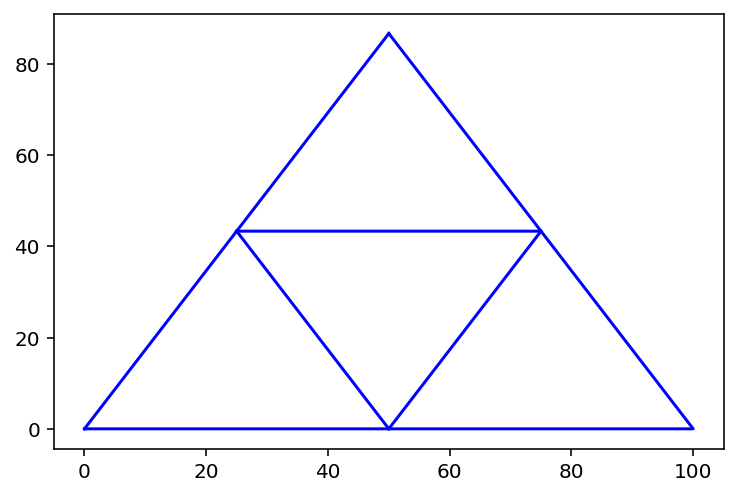

In [15]:
ax =plt.axes()
def dessinSous(ax,triangle):
    tria,trib,tric=sous_triangle(triangle0)
    dessine_triange(ax,tria)
    dessine_triange(ax,trib)
    dessine_triange(ax,tric)
dessinSous(ax,triangle0)

**Question 5**

Construire le triangle final en créant une fonction `sierpinsky` qui :
> prend en argument un entier $n$,
> crée uen figure et un axe,
> dessine le triangle de Sierpinsky au bout de n itérations.
    
On pourra commencer par tester cette fonction pour $n$ petit ($n$=5 par exemple).

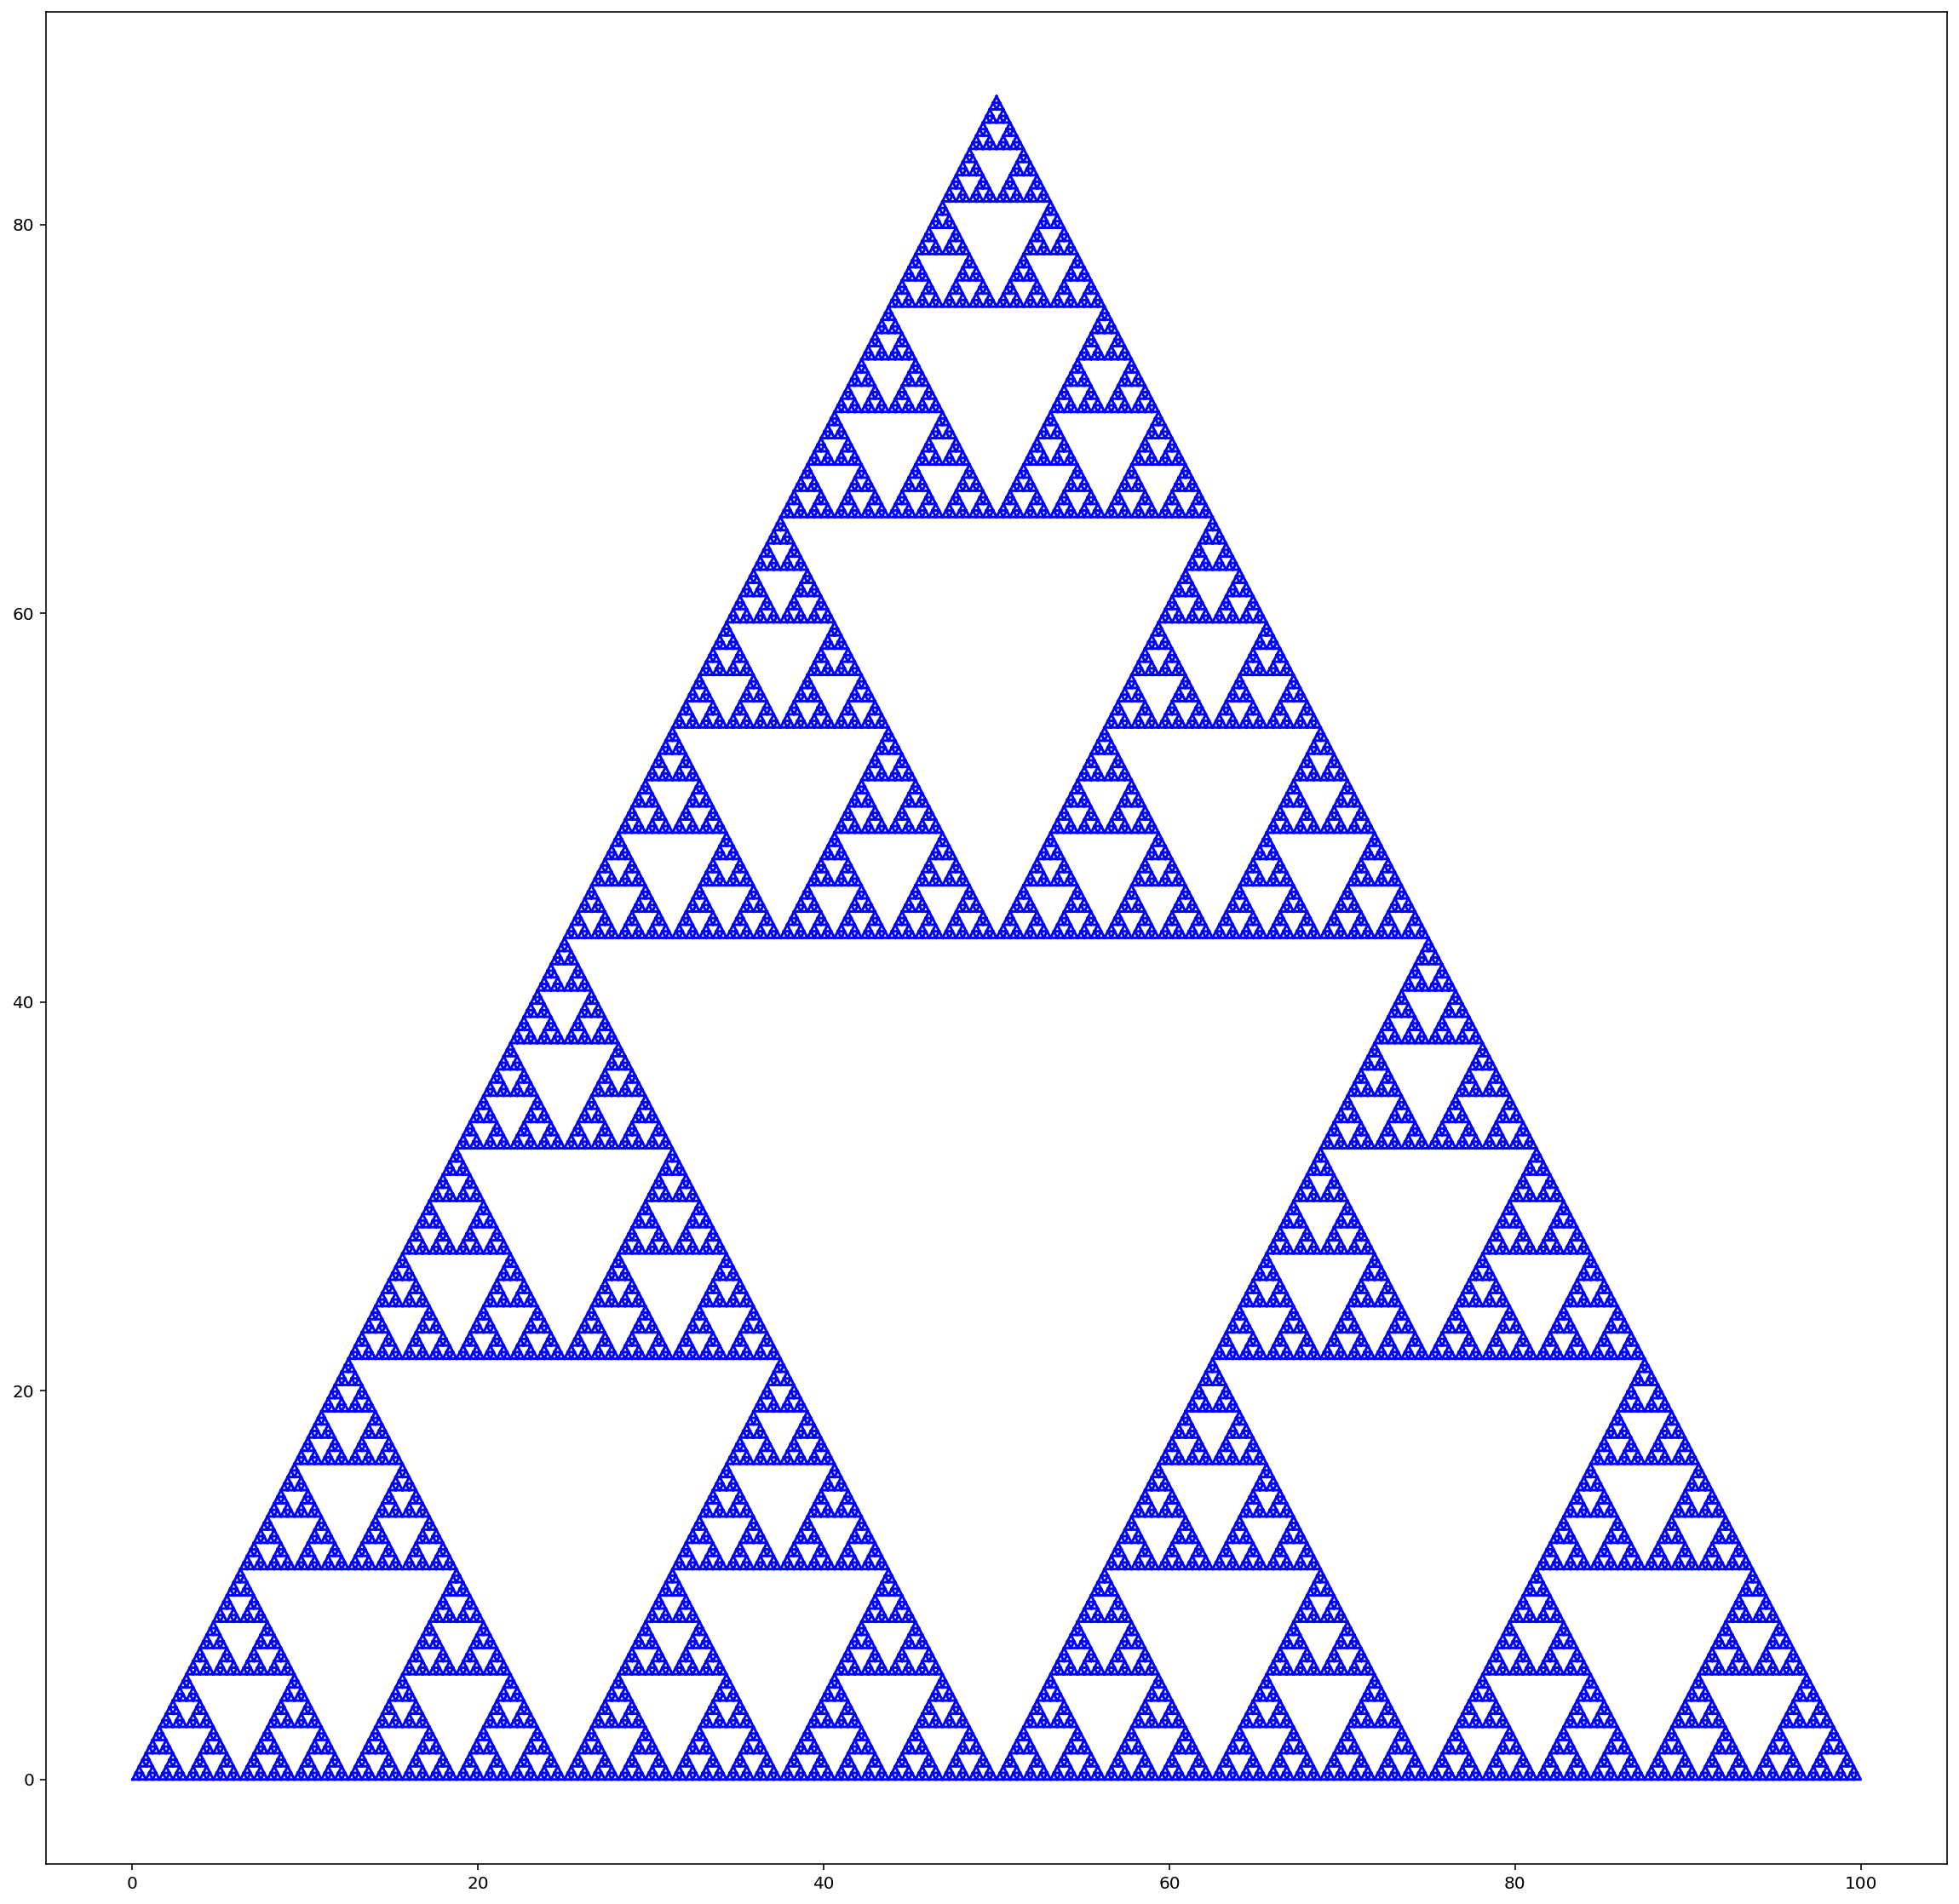

In [35]:
plt.figure(figsize=(20,20))
axeF = plt.axes()
def sierpinsky(n,triangle):
    ax,bx,cx=sous_triangle(triangle)
    if n==0:
        dessine_triange(axeF,ax)
        dessine_triange(axeF,bx)
        dessine_triange(axeF,cx)
        return 0
    else:
        #dessinSous(axeF,triangle)      
        n=n-1
        sierpinsky(n,ax)
        sierpinsky(n,bx)
        sierpinsky(n,cx)
        #print(ax)
    
sierpinsky(7,triangle0)
plt.show()

In [18]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) is the same as
       